**Compute the conversion factors $k$ for GBM**

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the $T_{90}$ catalogue (machine readable Table 5 from von Kienlin et al. 2020) 

In [3]:
t90s = []
e_t90 = []

with open('./von_kienlin20_apj_table5.txt', 'r') as infile:
    lines = infile.readlines()[93:]
    for line in lines:
        words = line.split()
        if len(words) == 8:
            t90s.append(float(words[2]))
            e_t90.append(float(words[3]))
        elif len(words) == 9:
            t90s.append(float(words[3]))
            e_t90.append(float(words[4]))
        else:
            raise Exception

# Load the fluence catalogue (machine readable Table 6 from von Kienlin et al. 2020)

In [4]:
fermi_ids = []
fluences = []
e_fluences = []

with open('./von_kienlin20_apj_table6.txt', 'r') as f:
    lines = f.readlines()[22:]
    for line in lines:
        words = line.split()
        fermi_ids.append(words[0])
        fluences.append(float(words[1]))
        e_fluences.append(float(words[2]))

In [5]:
fluence_dict = {'fermi_id': fermi_ids, 'T90': t90s, 'e_T90': e_t90, 'fluence': fluences, 'e_fluence': e_fluences}

fluence_df = pd.DataFrame(fluence_dict)
fluence_df.head()

,fermi_id,T90,e_T90,fluence,e_fluence
0,bn080714086,5.376,2.360,6.760000e-07,4.070000e-08
1,bn080714425,40.192,1.145,1.810000e-06,2.090000e-08
2,bn080714745,59.649,11.276,6.330000e-06,1.410000e-07
3,bn080715950,7.872,0.272,5.040000e-06,7.950000e-08
4,bn080717543,36.609,2.985,4.460000e-06,7.680000e-08


# Select only the long GRBs whit $S \geq 10^{-5}$

In [7]:
bright_fluence_df = fluence_df[np.logical_and(fluence_df['T90'] >= 2, fluence_df['fluence'] >= 1e-5)]
bright_fluence_df.head()

,fermi_id,T90,e_T90,fluence,e_fluence
7,bn080723557,58.369,1.985,0.000072,2.540000e-07
9,bn080723985,42.817,0.659,0.000031,2.070000e-07
10,bn080724401,379.397,2.202,0.000016,5.040000e-08
13,bn080727964,89.089,6.476,0.000013,7.910000e-08
23,bn080806896,75.777,4.185,0.000013,1.940000e-07


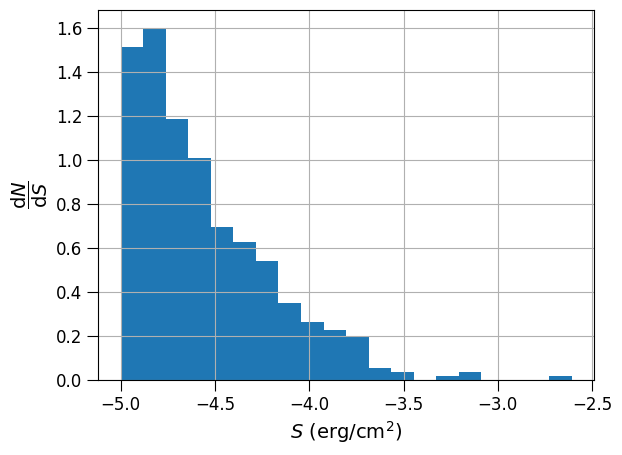

In [16]:
bright_fluence_df['fluence'].apply(np.log10).hist(bins=20, density=True)
plt.tick_params(which='both', size=8, labelsize=12)
plt.tick_params(which='both', size=8, labelsize=12)
plt.xlabel(r'$S$ (erg/cm$^2$)', size=14)
plt.ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d}S}$', size=14)
plt.show()

# Load the GBM DataFrame

In [18]:
gbm_df = pd.read_csv('./bright_gbm_grbs.csv', sep=',')
gbm_df.head()

,fermi_id,units,t_start,t_stop,curve,tot_counts/units
0,bn080723557,1,-0.096,181.856,bn080723557_LC_64ms_n4_bs.txt,47162.413470
1,bn080723985,2,-0.288,51.296,bn080723985_LC_64ms_n2_n5_bs.txt,15830.198335
2,bn080724401,5,-0.160,57.760,bn080724401_LC_64ms_n3_n4_n6_n7_n8_bs.txt,8048.411178
3,bn080727964,5,-13.408,31.392,bn080727964_LC_64ms_n0_n3_n4_n6_n7_bs.txt,3888.029758
4,bn080806896,4,-6.880,40.672,bn080806896_LC_64ms_n0_n1_n2_n9_bs.txt,7762.801075


In [19]:
sel_df = fluence_df[fluence_df['fermi_id'].isin(gbm_df['fermi_id'])]
sel_df.head()

,fermi_id,T90,e_T90,fluence,e_fluence
7,bn080723557,58.369,1.985,0.000072,2.540000e-07
9,bn080723985,42.817,0.659,0.000031,2.070000e-07
10,bn080724401,379.397,2.202,0.000016,5.040000e-08
13,bn080727964,89.089,6.476,0.000013,7.910000e-08
23,bn080806896,75.777,4.185,0.000013,1.940000e-07


In [20]:
len(sel_df) == len(gbm_df)

True

# Compute the $k$ factors

In [25]:
k = sel_df['fluence'].values/gbm_df['tot_counts/units'].values
k

/tmp/ipykernel_16541/2322901401.py:1: RuntimeWarning: divide by zero encountered in divide
  k = sel_df['fluence'].values/gbm_df['tot_counts/units'].values


array([1.53088009e-09, 1.94564840e-09, 1.95069557e-09, 3.42075571e-09,
       1.71329909e-09, 1.37168258e-09, 1.97409546e-09, 1.72853933e-09,
       2.21383018e-09, 1.46677511e-09, 8.75357519e-10, 3.04398137e-09,
       1.74205304e-10, 2.41280868e-09, 1.92568544e-09, 1.88485635e-09,
       2.57868107e-09, 2.57086205e-09, 5.18611906e-11, 1.15193034e-10,
       2.34380228e-09, 1.25479019e-09, 1.20194090e-09, 1.24065641e-10,
       1.05513941e-09, 2.15972878e-09, 6.56186655e-09,            inf,
       1.39274876e-10, 1.99766292e-09, 1.04923992e-09, 8.25515325e-11,
       1.09093286e-09, 1.13277774e-09, 2.13795217e-10, 1.24458908e-09,
       1.46568137e-09, 1.09668547e-09, 1.51506115e-10, 1.47720198e-09,
       1.00265252e-09, 1.53411104e-09, 1.59751267e-09, 1.26908195e-09,
       1.46047963e-09, 1.65911478e-09, 4.34207567e-09, 1.16334464e-09,
       1.56767628e-09, 2.04910574e-09, 1.81743824e-09, 1.37156466e-09,
       1.46376705e-09, 2.94652761e-09, 2.13930928e-09, 1.58063885e-09,
      

In [26]:
k = k[k != np.inf]
k

array([1.53088009e-09, 1.94564840e-09, 1.95069557e-09, 3.42075571e-09,
       1.71329909e-09, 1.37168258e-09, 1.97409546e-09, 1.72853933e-09,
       2.21383018e-09, 1.46677511e-09, 8.75357519e-10, 3.04398137e-09,
       1.74205304e-10, 2.41280868e-09, 1.92568544e-09, 1.88485635e-09,
       2.57868107e-09, 2.57086205e-09, 5.18611906e-11, 1.15193034e-10,
       2.34380228e-09, 1.25479019e-09, 1.20194090e-09, 1.24065641e-10,
       1.05513941e-09, 2.15972878e-09, 6.56186655e-09, 1.39274876e-10,
       1.99766292e-09, 1.04923992e-09, 8.25515325e-11, 1.09093286e-09,
       1.13277774e-09, 2.13795217e-10, 1.24458908e-09, 1.46568137e-09,
       1.09668547e-09, 1.51506115e-10, 1.47720198e-09, 1.00265252e-09,
       1.53411104e-09, 1.59751267e-09, 1.26908195e-09, 1.46047963e-09,
       1.65911478e-09, 4.34207567e-09, 1.16334464e-09, 1.56767628e-09,
       2.04910574e-09, 1.81743824e-09, 1.37156466e-09, 1.46376705e-09,
       2.94652761e-09, 2.13930928e-09, 1.58063885e-09, 1.41617829e-09,
      

In [27]:
k = np.log10(k)
k

array([ -8.81505882,  -8.71093564,  -8.7098105 ,  -8.46587794,
        -8.76616682,  -8.86274638,  -8.70463185,  -8.76232073,
        -8.6548557 ,  -8.83363647,  -9.05781453,  -8.51655801,
        -9.75893863,  -8.61747711,  -8.71541465,  -8.72472174,
        -8.58860237,  -8.58992123, -10.28515752,  -9.93857378,
        -8.63007903,  -8.90142889,  -8.92011688,  -9.90634848,
        -8.97669016,  -8.66560078,  -8.18297261,  -9.85612722,
        -8.69947779,  -8.9791252 , -10.08327486,  -8.96220198,
        -8.94585529,  -9.67000202,  -8.90497402,  -8.83396043,
        -8.95991791,  -9.81956984,  -8.83056012,  -8.99884955,
        -8.8141432 ,  -8.79655569,  -8.89651033,  -8.8355045 ,
        -8.78012357,  -8.36230261,  -8.93429161,  -8.80474361,
        -8.68843563,  -8.74054034,  -8.86278371,  -8.83452803,
        -8.53068949,  -8.66972643,  -8.80116735,  -8.84888207,
        -9.82759007, -10.10113525,  -9.91433798,  -8.72760665,
        -8.69981585,  -8.59761071,  -8.93455839, -10.22

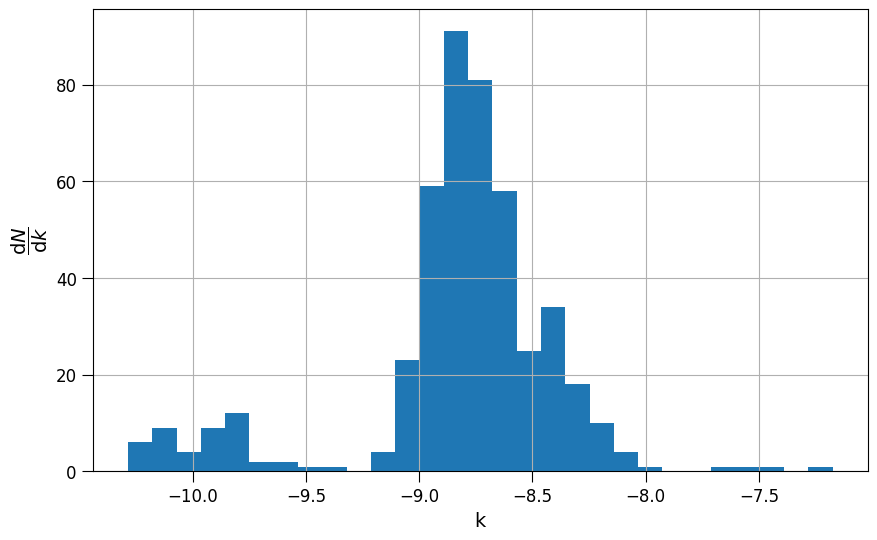

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(k, bins=np.linspace(min(k), max(k), 30))
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'k', size=14)
ax.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d}k}$', size=14)
ax.grid(which='both')
plt.show()

In [30]:
import os
if not os.path.isfile('./log10_fluence_over_counts_Fermi_GBM.txt'):
    np.savetxt('./log10_fluence_over_counts_Fermi_GBM.txt', k)